EDA and data visualization

Correlation Analysis

Model Building

Model Testing

Model Prediction

In [1]:
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as sfa

In [2]:
at_df = pd.read_csv("/Users/Akshay/Documents/DataScience/ExcelR/Practice_DS/Python/LinearRegression/WC_AT.csv")
at_df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [3]:
at_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [4]:
at_df.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


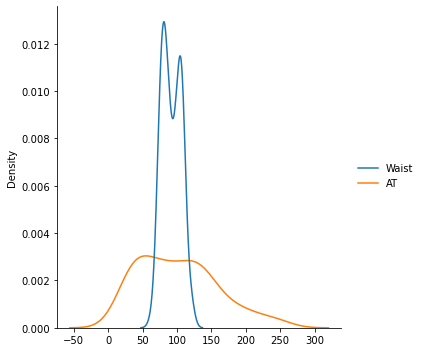

In [9]:
sns.displot(at_df,kind='kde',legend=True)

In [10]:
at_df.corr()#correlation coefficient

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<AxesSubplot:xlabel='Waist', ylabel='AT'>

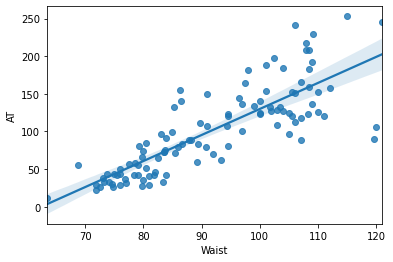

In [31]:
sns.regplot(x='Waist',y='AT',data = at_df)

In [20]:
#Build a model
#based on the problem statment waist is a independent/predict(x) variable and AT is a dependent/response(y) variable
model = sfa.ols('AT~Waist',data = at_df).fit()
model

In [21]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k

In [22]:
#before predicting values lets check the coefficient determination
coeff_detr = model.rsquared
print('coefficient Determination-------',coeff_detr)

coefficient Determination------- 0.6700368930528429


In [23]:
print(model.pvalues,'\n\n\n',model.tvalues)

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64 


 Intercept    -9.909103
Waist        14.740376
dtype: float64


In [24]:
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [35]:
array = pd.Series([60])
df = pd.DataFrame(array,columns= ['Waist'])
model.predict(df)

0   -8.449924
dtype: float64

In [ ]:
#Robhus scalar
from sklearn.preprocessing import RobustScaler
arr = salary_df.values
scaler = RobustScaler() 
data_scaled = scaler.fit_transform(arr)

In [52]:
data_x = at_df['AT']
data_x.values

data_x.shape()

TypeError: 'tuple' object is not callable

In [50]:
data_x.values.reshape(1,-1)

array([[ 25.72,  25.89,  42.6 ,  42.8 ,  29.84,  21.68,  29.08,  32.98,
         11.44,  32.22,  28.32,  43.86,  38.21,  42.48,  30.96,  55.78,
         43.78,  33.41,  43.35,  29.31,  36.6 ,  40.25,  35.43,  60.09,
         45.84,  70.4 ,  83.45,  84.3 ,  78.89,  64.75,  72.56,  89.31,
         78.94,  83.55, 127.  , 121.  , 107.  , 129.  ,  74.02,  55.48,
         73.13,  50.5 ,  50.88, 140.  ,  96.54, 118.  , 107.  , 123.  ,
         65.92,  81.29, 111.  ,  90.73, 133.  ,  41.9 ,  41.71,  58.16,
         88.85, 155.  ,  70.77,  75.08,  57.05,  99.73,  27.96, 123.  ,
         90.41, 106.  , 144.  , 121.  ,  97.13, 166.  ,  87.99, 154.  ,
        100.  , 123.  , 217.  , 140.  , 109.  , 127.  , 112.  , 192.  ,
        132.  , 126.  , 153.  , 158.  , 183.  , 184.  , 121.  , 159.  ,
        245.  , 137.  , 165.  , 152.  , 181.  ,  80.95, 137.  , 125.  ,
        241.  , 134.  , 150.  , 198.  , 151.  , 229.  , 253.  , 188.  ,
        124.  ,  62.2 , 133.  , 208.  , 208.  ]])

In [54]:
from sklearn.model_selection import train_test_split
train, valid= train_test_split(at_df, test_size=0.33, random_state = 1)


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


,Waist,AT
27,80.5,84.30
36,91.0,107.00
80,103.5,132.00
39,79.0,55.48
65,119.9,106.00
...,...,...
9,73.2,32.22
72,97.0,100.00
12,73.1,38.21
107,107.9,208.00


In [89]:
from sklearn.linear_model import LinearRegression
class1 = LinearRegression()
x= at_df['Waist'].values.reshape(-1,1)
model = class1.fit(x,at_df['AT'])#(x{1,n},y{n,1}) lways convert x variable to 1 column with n rows using reshape func reshape(-1,1)
print(model.intercept_,'\n\n',model.coef_)

-215.98148796164242 

 [3.45885939]


In [74]:
track = np.array([[23.09, 23.41, 24.01], [22.55, 23.05, 23.09]])
track.shape

(2, 3)

In [95]:
at_df['Waist'].head().values.shape

(5,)

In [77]:
at_df['AT'].head().values.shape

(5,)

In [92]:
n = pd.Series([3,6,7])
n.values

array([3, 6, 7], dtype=int64)

In [93]:
n

0    3
1    6
2    7
dtype: int64

In [94]:
at_df['AT'].shape

(109,)